## Imports

In [1]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy . linalg as lng # linear algebra from scipy library
from scipy . spatial import distance # load distance function
from sklearn import preprocessing as preproc # load preprocessing function

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [2]:
diabetPath = './DiabetesDataNormalized.txt'
T = np.loadtxt(diabetPath, delimiter = ' ', skiprows = 1)
y = T[:, 10]
X = T[:,:10]

# Get number of observations (n) and number of independent variables (p)
[n, p] = np.shape(X)

M = X

## 2 Examine Bias and Variance for the OLS:

> (a) Investigate the unbiasedness of OLS using simulated data as follows.

>> (i) Create a random matrix ${\bf X}$ consisting of three random variables which are NID, with $X ∼ N ({\bf 0}, {\bf I})$ and sample 10 observations from each.

>> (ii) Create the true regression parameters $β_{true} = [1, 2, 3]^T$.

>> (iii) Create the response y by the linear model ${\bf y} = {\bf X}β + {\bf ε}$. Make sure the errors ε are homoscedastic and zero-mean $ε ∼ N(0,σ^2)$, where $σ^2$ denotes the noise level in the simulated data.

>> (iv) Estimate the regression coefficients $β$ from this data

In [3]:
# Create a function that takes n and p as parameters and returns an estimate of the betas
def estimate_betas(n, p, beta_true, sigma):
    """

    Parameters:
    n (int): number of observations
    p (int): number of features
    true_betas (array): array of ture betas

    Returns:
    true_betas: the estimated betas

   """
    variance = 1.0
    mu = 0.0
    # feature matrix
    X = np.random.normal(mu, variance, size=(n, p)) # random from N(0,1)

    y = np.matmul(X, beta_true) + np.random.normal(mu, sigma, size=n) # Measures response - true value plus noise level
    beta = lng.lstsq(X, y)[0] # Estimates

    return beta

n = 10 # number of observations
p = 3 # features / independent variables
beta_true = np.array([1, 2, 3])
sigma = 0.1

beta = estimate_betas(n, p, beta_true, sigma)
print (f'Estimated betas:{beta}')

Estimated betas:[0.96659212 1.94714446 3.05891413]


>> (v) Repeat steps (iii)-(iv) 100 times.

In [4]:
m = 100 # number of experiments
betas = np.zeros((p, m)) # all variable estimates
for i in range(m):
    betas[:, i] = estimate_betas(n, p, beta_true, sigma) # Estimates

>> (vi) Use meaningful plots to investigate bias and variance for the model. Experiment with different noise levels $σ^2$. 

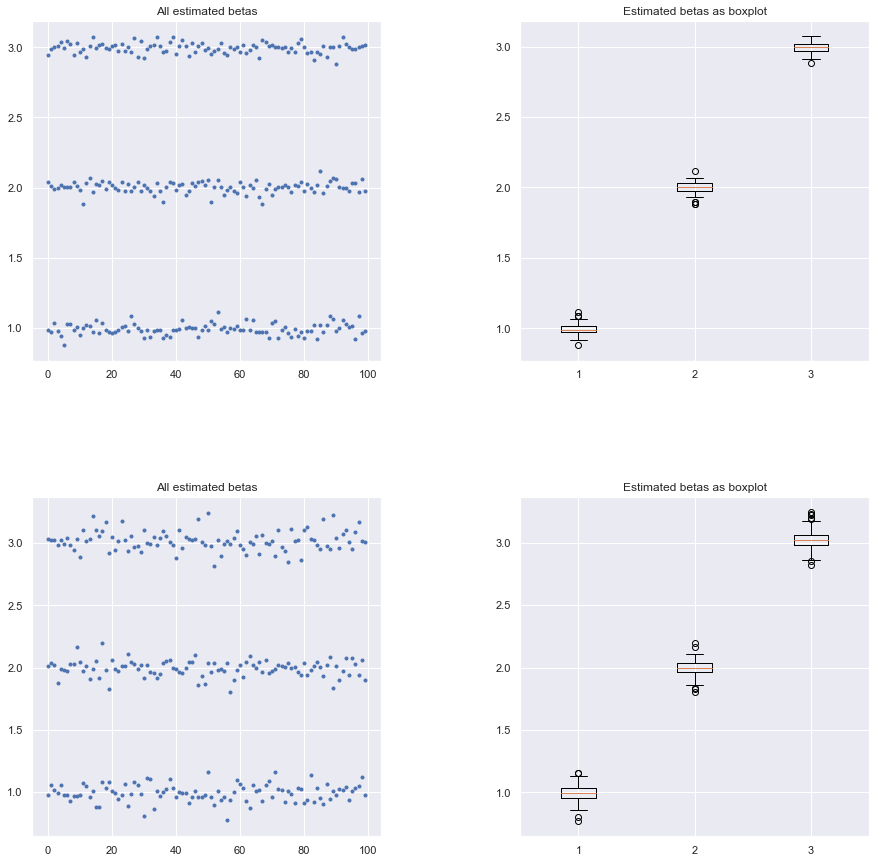

In [5]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
sub_plot_numer = 0
for j in range(1,3):
    sigma = j / 10
    
    for i in range(m):
        betas[:, i] = estimate_betas(n, p, beta_true, sigma) # Estimates
    
    sub_plot_numer+=1
    ax = fig.add_subplot(2, 2, sub_plot_numer)
    ax.set_title("All estimated betas")
    lines = ax.scatter([range(m)] * 3, betas.T, marker = ".")
    sub_plot_numer += 1
    ax2 = fig.add_subplot(2,2,sub_plot_numer)
    ax2.set_title("Estimated betas as boxplot")
    ax2.boxplot(betas.T)

